In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm # progress bars :)
tqdm.pandas()

In [2]:
size_acc = pd.read_csv("gtdb-rs202.size_accuracy.csv.gz")
size_acc['accession'] = size_acc['name'].str.split(" ", expand=True)[0]
#size_acc.set_index("accession", inplace=True)
size_acc['rel_err'] = size_acc['rel_err'].astype(float)
size_acc.head()

,name,alphabet,ksize,scaled,rel_err,probability,alpha-ksize,accession
0,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,1,0.05,1.000000,nucleotide-21,GCF_000023945.1
1,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,1000,0.05,0.850210,nucleotide-21,GCF_000023945.1
2,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,2000,0.05,0.448999,nucleotide-21,GCF_000023945.1
3,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,1,0.10,1.000000,nucleotide-21,GCF_000023945.1
4,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,1000,0.10,0.999937,nucleotide-21,GCF_000023945.1


In [3]:
dnaDF = pd.read_csv("gtdb-rs202.evolpaths.nucleotide.csv.gz")
dnaDF.head()


,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIm coverage threshold,EzAAIb AAI,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,minContain ANI,avgContain ANI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,0.5,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.926776,0.942109
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,0.5,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,0.5,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.927531,0.943375
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,0.5,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.689328,0.701284
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,0.5,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246


In [4]:
dnaDF.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard ANI',
       'containA ANI', 'containAani_low', 'containAani_high', 'containB ANI',
       'containBani_low', 'containBani_high', 'maxContain ANI', 'acANI',
       'alpha-ksize', 'compareM AAI', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani ANI',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'EzAAIm AAI', 'EzAAIm anchor CDS count', 'EzAAIm compare CDS count',
       'EzAAIm matched CDS count', 'EzAAIm proteome coverage',
       '

In [5]:
dnaDF['alpha-ksize'].unique()

array(['nucleotide-21', 'nucleotide-31', 'nucleotide-51'], dtype=object)

In [6]:
dnaDF['ANIdiff'] = dnaDF["avgContain ANI"] - dnaDF["ANIb ident"]
dnaDF.head()

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb AAI,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,minContain ANI,avgContain ANI,ANIdiff
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.926776,0.942109,0.004759
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416,0.006065
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,0.929249,1965,3590,1583,0.569937,0.3,0.3,0.927531,0.943375,0.006024
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.689328,0.701284,NaN
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,0.634232,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246,NaN


In [7]:
def pass_thresh(row, df=size_acc, rel_err=0.05, prob_thresh=0.95):
    scaled = row['scaled']
    ak = row['alpha-ksize']
    anchor_acc = row["anchor_name"]
    compare_acc = row["compare_name"]
    these_accs = df[df["accession"].isin([anchor_acc,compare_acc])]
    these_params = these_accs[(these_accs["rel_err"] == rel_err) & (these_accs["scaled"] == scaled) & (these_accs["alpha-ksize"] == ak)]
    these_params.set_index("accession", inplace=True)
    #print(these_params)
    #print(anchor_acc)
    #anchor_prob = these_params[these_params["accession"] == anchor_acc]["probability"]
    #compare_prob = these_params[these_params["accession"] == compare_acc]["probability"]
    anchor_prob = these_params.at[anchor_acc, "probability"]
    compare_prob = these_params.at[compare_acc, "probability"]
    if anchor_prob >= prob_thresh and compare_prob >= prob_thresh:
        return "pass"
    elif anchor_prob >=prob_thresh:
        return "compare_fail"
    elif compare_prob >=prob_thresh:
        return "anchor_fail"
    return "fail"

In [13]:
#def_sizeac = size_acc[(size_acc["rel_err"] == 0.05)]
dnaDF['sizeacc_default'] = dnaDF.progress_apply(pass_thresh, axis=1,rel_err=0.05, prob_thresh=0.95)
dnaDF.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221130/221130 [5:48:06<00:00, 10.59it/s]


,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,minContain ANI,avgContain ANI,ANIdiff,sizeacc_default
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,1965,3590,1583,0.569937,0.3,0.3,0.926776,0.942109,0.004759,pass
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416,0.006065,fail
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,1965,3590,1583,0.569937,0.3,0.3,0.927531,0.943375,0.006024,fail
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,1965,3596,1057,0.380147,0.3,0.3,0.689328,0.701284,NaN,pass
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246,NaN,fail


In [14]:
dnaDF.head()

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb anchor CDS count,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,minContain ANI,avgContain ANI,ANIdiff,sizeacc_default
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,1965,3590,1583,0.569937,0.3,0.3,0.926776,0.942109,0.004759,pass
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,1965,3590,1583,0.569937,0.3,0.3,0.928150,0.943416,0.006065,fail
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,1965,3590,1583,0.569937,0.3,0.3,0.927531,0.943375,0.006024,fail
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,1965,3596,1057,0.380147,0.3,0.3,0.689328,0.701284,NaN,pass
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,1965,3596,1057,0.380147,0.3,0.3,0.721482,0.734246,NaN,fail


In [16]:
dnaDF['sizeacc_re0.2'] = dnaDF.progress_apply(pass_thresh, axis=1, rel_err=0.2, prob_thresh=0.95)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221130/221130 [13:29:54<00:00,  4.55it/s]


In [17]:
dnaDF.head()

,comparison_name,anchor_name,compare_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,...,EzAAIb compare CDS count,EzAAIb matched CDS count,EzAAIb proteome coverage,EzAAIb id threshold,EzAAIb coverage threshold,minContain ANI,avgContain ANI,ANIdiff,sizeacc_default,sizeacc_re0.2
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1,0.155515,0.401210,...,3590,1583,0.569937,0.3,0.3,0.926776,0.942109,0.004759,pass,pass
1,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,1000,0.160974,0.412247,...,3590,1583,0.569937,0.3,0.3,0.928150,0.943416,0.006065,fail,pass
2,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,nucleotide,21,2000,0.159965,0.417136,...,3590,1583,0.569937,0.3,0.3,0.927531,0.943375,0.006024,fail,pass
3,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1,0.000272,0.000828,...,3596,1057,0.380147,0.3,0.3,0.689328,0.701284,NaN,pass,pass
4,GCA_004524385.1_x_GCA_011364975.1,GCA_004524385.1,GCA_011364975.1,path1,family,nucleotide,21,1000,0.000712,0.002187,...,3596,1057,0.380147,0.3,0.3,0.721482,0.734246,NaN,fail,pass


In [18]:
#dnaDF.to_csv("gtdb-rs202.evolpaths.nucleotide.with-sizeacc.csv.gz", index=False)

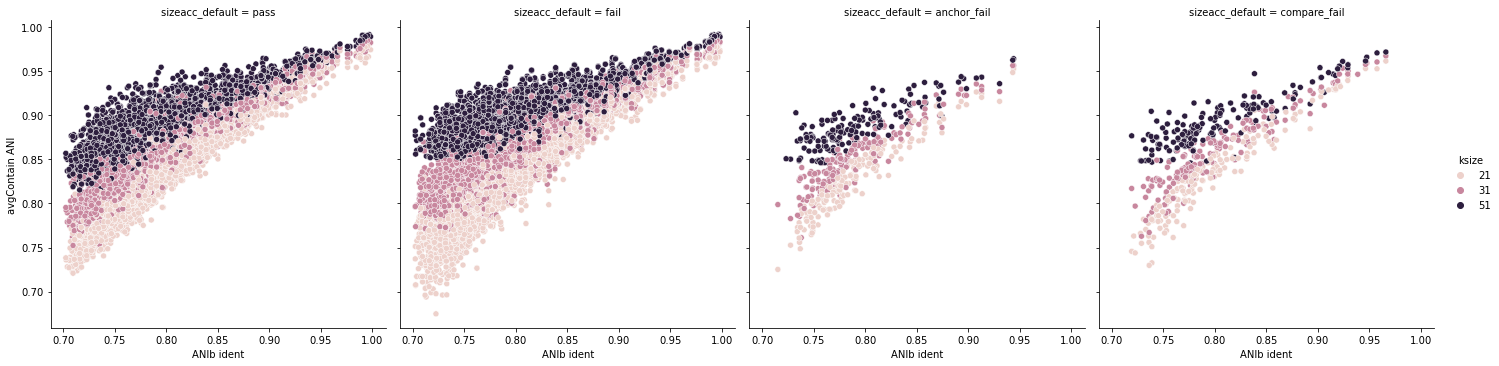

In [20]:
g=sns.relplot(data=dnaDF, 
                  x="ANIb ident", y="avgContain ANI", 
                  col="sizeacc_default", hue="ksize") 

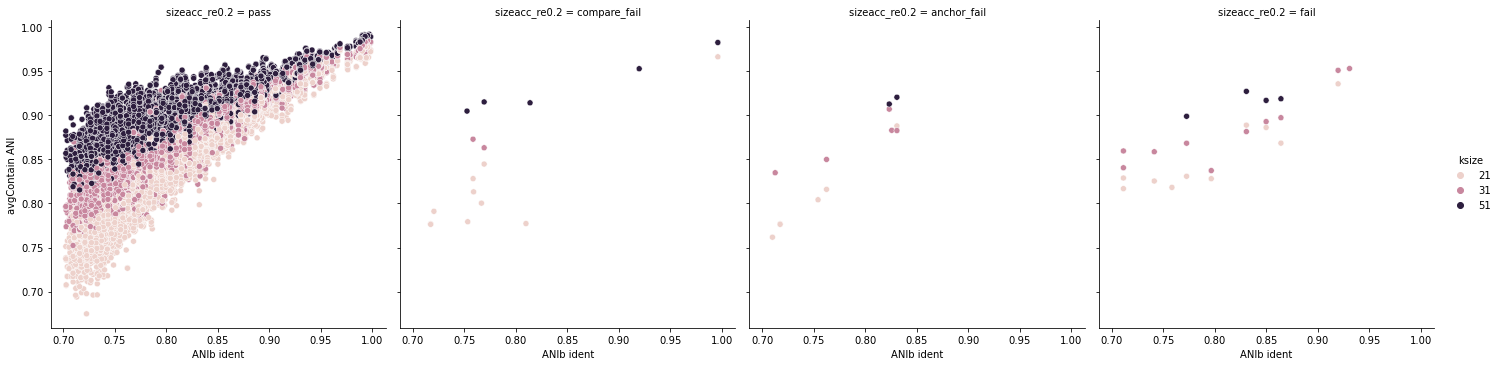

In [21]:
g=sns.relplot(data=dnaDF, 
                  x="ANIb ident", y="avgContain ANI", 
                  col="sizeacc_re0.2", hue="ksize") 

In [37]:
compare_id_vars = ["comparison_name", "path", 
                   "lowest_common_rank", "anchor_name", 
                   "compare_name", "alpha-ksize", 
                   "alphabet", "ksize","scaled", 
                    "ANIb ident", 
                    "ANIb_coverage", 
                   "sizeacc_default", "sizeacc_re0.2"]

nucl_value_vars = ["avgContain ANI",] 
                  # "fastani ANI", "ANIm ident"]
        #["jaccard ANI", "containA ANI", 
        #           "containB ANI", "maxContain ANI", 
        #           "minContain ANI", 

In [38]:
melted=pd.melt(dnaDF,id_vars= compare_id_vars,
                     value_vars=nucl_value_vars,
                     var_name='estimator', value_name='ANI')
melted

,comparison_name,path,lowest_common_rank,anchor_name,compare_name,alpha-ksize,alphabet,ksize,scaled,ANIb ident,ANIb_coverage,sizeacc_default,sizeacc_re0.2,estimator,ANI
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,nucleotide-21,nucleotide,21,1,0.937351,0.582294,pass,pass,avgContain ANI,0.942109
1,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,nucleotide-21,nucleotide,21,1000,0.937351,0.582294,fail,pass,avgContain ANI,0.943416
2,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,nucleotide-21,nucleotide,21,2000,0.937351,0.582294,fail,pass,avgContain ANI,0.943375
3,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,nucleotide-21,nucleotide,21,1,NaN,NaN,pass,pass,avgContain ANI,0.701284
4,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,nucleotide-21,nucleotide,21,1000,NaN,NaN,fail,pass,avgContain ANI,0.734246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221125,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,nucleotide-51,nucleotide,51,1000,NaN,NaN,fail,pass,avgContain ANI,NaN
221126,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,nucleotide-51,nucleotide,51,2000,NaN,NaN,fail,pass,avgContain ANI,NaN
221127,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,nucleotide-51,nucleotide,51,1,NaN,NaN,pass,pass,avgContain ANI,NaN
221128,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,nucleotide-51,nucleotide,51,1000,NaN,NaN,fail,pass,avgContain ANI,NaN


In [39]:
melted["ANIdiff"] = melted["ANI"] - melted['ANIb ident']
melted

,comparison_name,path,lowest_common_rank,anchor_name,compare_name,alpha-ksize,alphabet,ksize,scaled,ANIb ident,ANIb_coverage,sizeacc_default,sizeacc_re0.2,estimator,ANI,ANIdiff
0,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,nucleotide-21,nucleotide,21,1,0.937351,0.582294,pass,pass,avgContain ANI,0.942109,0.004759
1,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,nucleotide-21,nucleotide,21,1000,0.937351,0.582294,fail,pass,avgContain ANI,0.943416,0.006065
2,GCA_004524385.1_x_GCA_004524535.1,path1,genus,GCA_004524385.1,GCA_004524535.1,nucleotide-21,nucleotide,21,2000,0.937351,0.582294,fail,pass,avgContain ANI,0.943375,0.006024
3,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,nucleotide-21,nucleotide,21,1,NaN,NaN,pass,pass,avgContain ANI,0.701284,NaN
4,GCA_004524385.1_x_GCA_011364975.1,path1,family,GCA_004524385.1,GCA_011364975.1,nucleotide-21,nucleotide,21,1000,NaN,NaN,fail,pass,avgContain ANI,0.734246,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221125,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,nucleotide-51,nucleotide,51,1000,NaN,NaN,fail,pass,avgContain ANI,NaN,NaN
221126,GCA_002409405.1_x_GCA_003567135.1,path999,phylum,GCA_002409405.1,GCA_003567135.1,nucleotide-51,nucleotide,51,2000,NaN,NaN,fail,pass,avgContain ANI,NaN,NaN
221127,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,nucleotide-51,nucleotide,51,1,NaN,NaN,pass,pass,avgContain ANI,NaN,NaN
221128,GCA_002409405.1_x_GCF_004319585.1,path999,superkingdom,GCA_002409405.1,GCF_004319585.1,nucleotide-51,nucleotide,51,1000,NaN,NaN,fail,pass,avgContain ANI,NaN,NaN


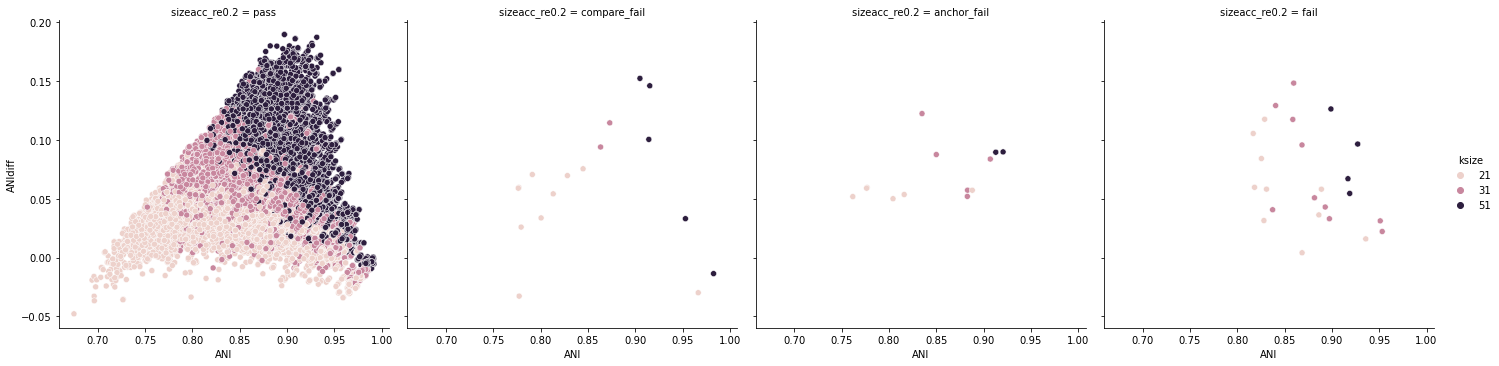

In [40]:
g=sns.relplot(data=melted, 
                  x="ANI", y="ANIdiff", 
                  col="sizeacc_re0.2", hue="ksize") 

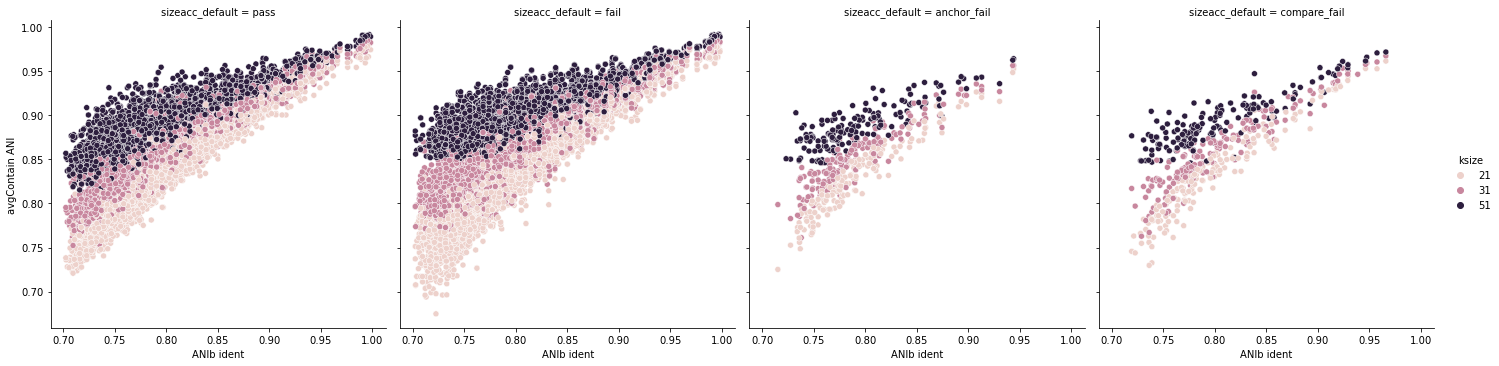

In [41]:
g=sns.relplot(data=dnaDF, 
                  x="ANIb ident", y="avgContain ANI", 
                  col="sizeacc_default", hue="ksize") 

In [36]:
# look at average ANIdiff for pass/fail

In [56]:
melted.groupby("sizeacc_default")["ANIdiff"].agg(["count","mean", "std"])

ANIb ident                     ANIdiff                    
                     count      mean       std   count      mean       std
sizeacc_default                                                           
anchor_fail            517  0.791297  0.045756     501  0.063414  0.030990
compare_fail           491  0.803948  0.056937     480  0.058415  0.032922
fail                 17324  0.799074  0.062055   15821  0.059660  0.036622
pass                 11755  0.803537  0.061044   11752  0.061700  0.034455

In [58]:
melted.groupby("sizeacc_re0.2")["ANIdiff"].agg(["count","mean","std"])

,count,mean,std
sizeacc_re0.2,,,
anchor_fail,13,0.070224,0.022145
compare_fail,17,0.059491,0.054064
fail,24,0.067729,0.040445
pass,28500,0.060534,0.035595


In [59]:
# any use to look at ANIb ident?
melted.groupby("sizeacc_re0.2")[["ANIb ident", "ANIdiff"]].agg(["count","mean","std"])

ANIb ident                     ANIdiff                    
                   count      mean       std   count      mean       std
sizeacc_re0.2                                                           
anchor_fail           18  0.762937  0.050269      13  0.070224  0.022145
compare_fail          36  0.772073  0.068072      17  0.059491  0.054064
fail                  30  0.791844  0.070513      24  0.067729  0.040445
pass               30003  0.800829  0.061360   28500  0.060534  0.035595